In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import matplotlib
# matplotlib.use('pgf')
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.gridspec import GridSpec, GridSpecFromSubplotSpec
import matplotlib.lines as mlines

from module.visualize import plot_rot_stats, plot_err_props

In [2]:
text_width = 5.50107 # in  --> Confirmed with template explanation
golden_ratio = (5**.5 - 1) / 2

c = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', 
     '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf'] 


formatting = {
#     "DUN": {"color": c[0], "linestyle": "-", "marker": "o", "label": "DUN"},
#     "ensemble": {"color": c[2], "linestyle": "-.", "marker": "o", "label": "Ensemble"}, 
#     "dropout": {"color": c[3], "linestyle": ":", "marker": "o", "label": "Dropout"}, 
#     "SGD": {"color": c[1], "linestyle": "--", "marker": "o", "label": "SGD"},
#     "DUN (exact)": {"color": c[6], "linestyle": (0, [6, 2, 1, 2, 1, 2]), "marker": "o", "label": "DUN (exact)"},
#     "dropout (0.3)": {"color": c[7], "linestyle": ":", "marker": "p", "label": "Dropout (0.3)"},
    "flow": {"color": c[8], "linestyle": "-", "marker": "o", "label": "flow"},
}

In [3]:
img_df = pd.read_csv('flow_image.csv')  
# img_df = pd.read_csv('out_2.csv')  

print(img_df.dtypes)
img_df

Unnamed: 0          int64
method             object
dataset            object
model              object
ll                float64
err               float64
ece               float64
brier             float64
rotation          float64
corruption        float64
auc_roc           float64
err_props          object
target_dataset     object
dtype: object


,Unnamed: 0,method,dataset,model,ll,err,ece,brier,rotation,corruption,auc_roc,err_props,target_dataset
0,0,flow,MNIST,res18,-1.473753,0.005409,NaN,NaN,0.0,0.0,NaN,NaN,NaN
1,1,flow,MNIST,res18,-1.484872,0.013421,NaN,NaN,15.0,0.0,NaN,NaN,NaN
2,2,flow,MNIST,res18,-1.559977,0.080228,NaN,NaN,30.0,0.0,NaN,NaN,NaN
3,3,flow,MNIST,res18,-1.801604,0.327324,NaN,NaN,45.0,0.0,NaN,NaN,NaN
4,4,flow,MNIST,res18,-2.088854,0.627404,NaN,NaN,60.0,0.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
135,135,flow,MNIST,res18,-2.155506,0.704327,NaN,NaN,135.0,0.0,NaN,NaN,NaN
136,136,flow,MNIST,res18,-2.074590,0.618389,NaN,NaN,150.0,0.0,NaN,NaN,NaN
137,137,flow,MNIST,res18,-2.025644,0.567208,NaN,NaN,165.0,0.0,NaN,NaN,NaN
138,138,flow,MNIST,res18,-2.007445,0.550681,NaN,NaN,180.0,0.0,NaN,NaN,NaN


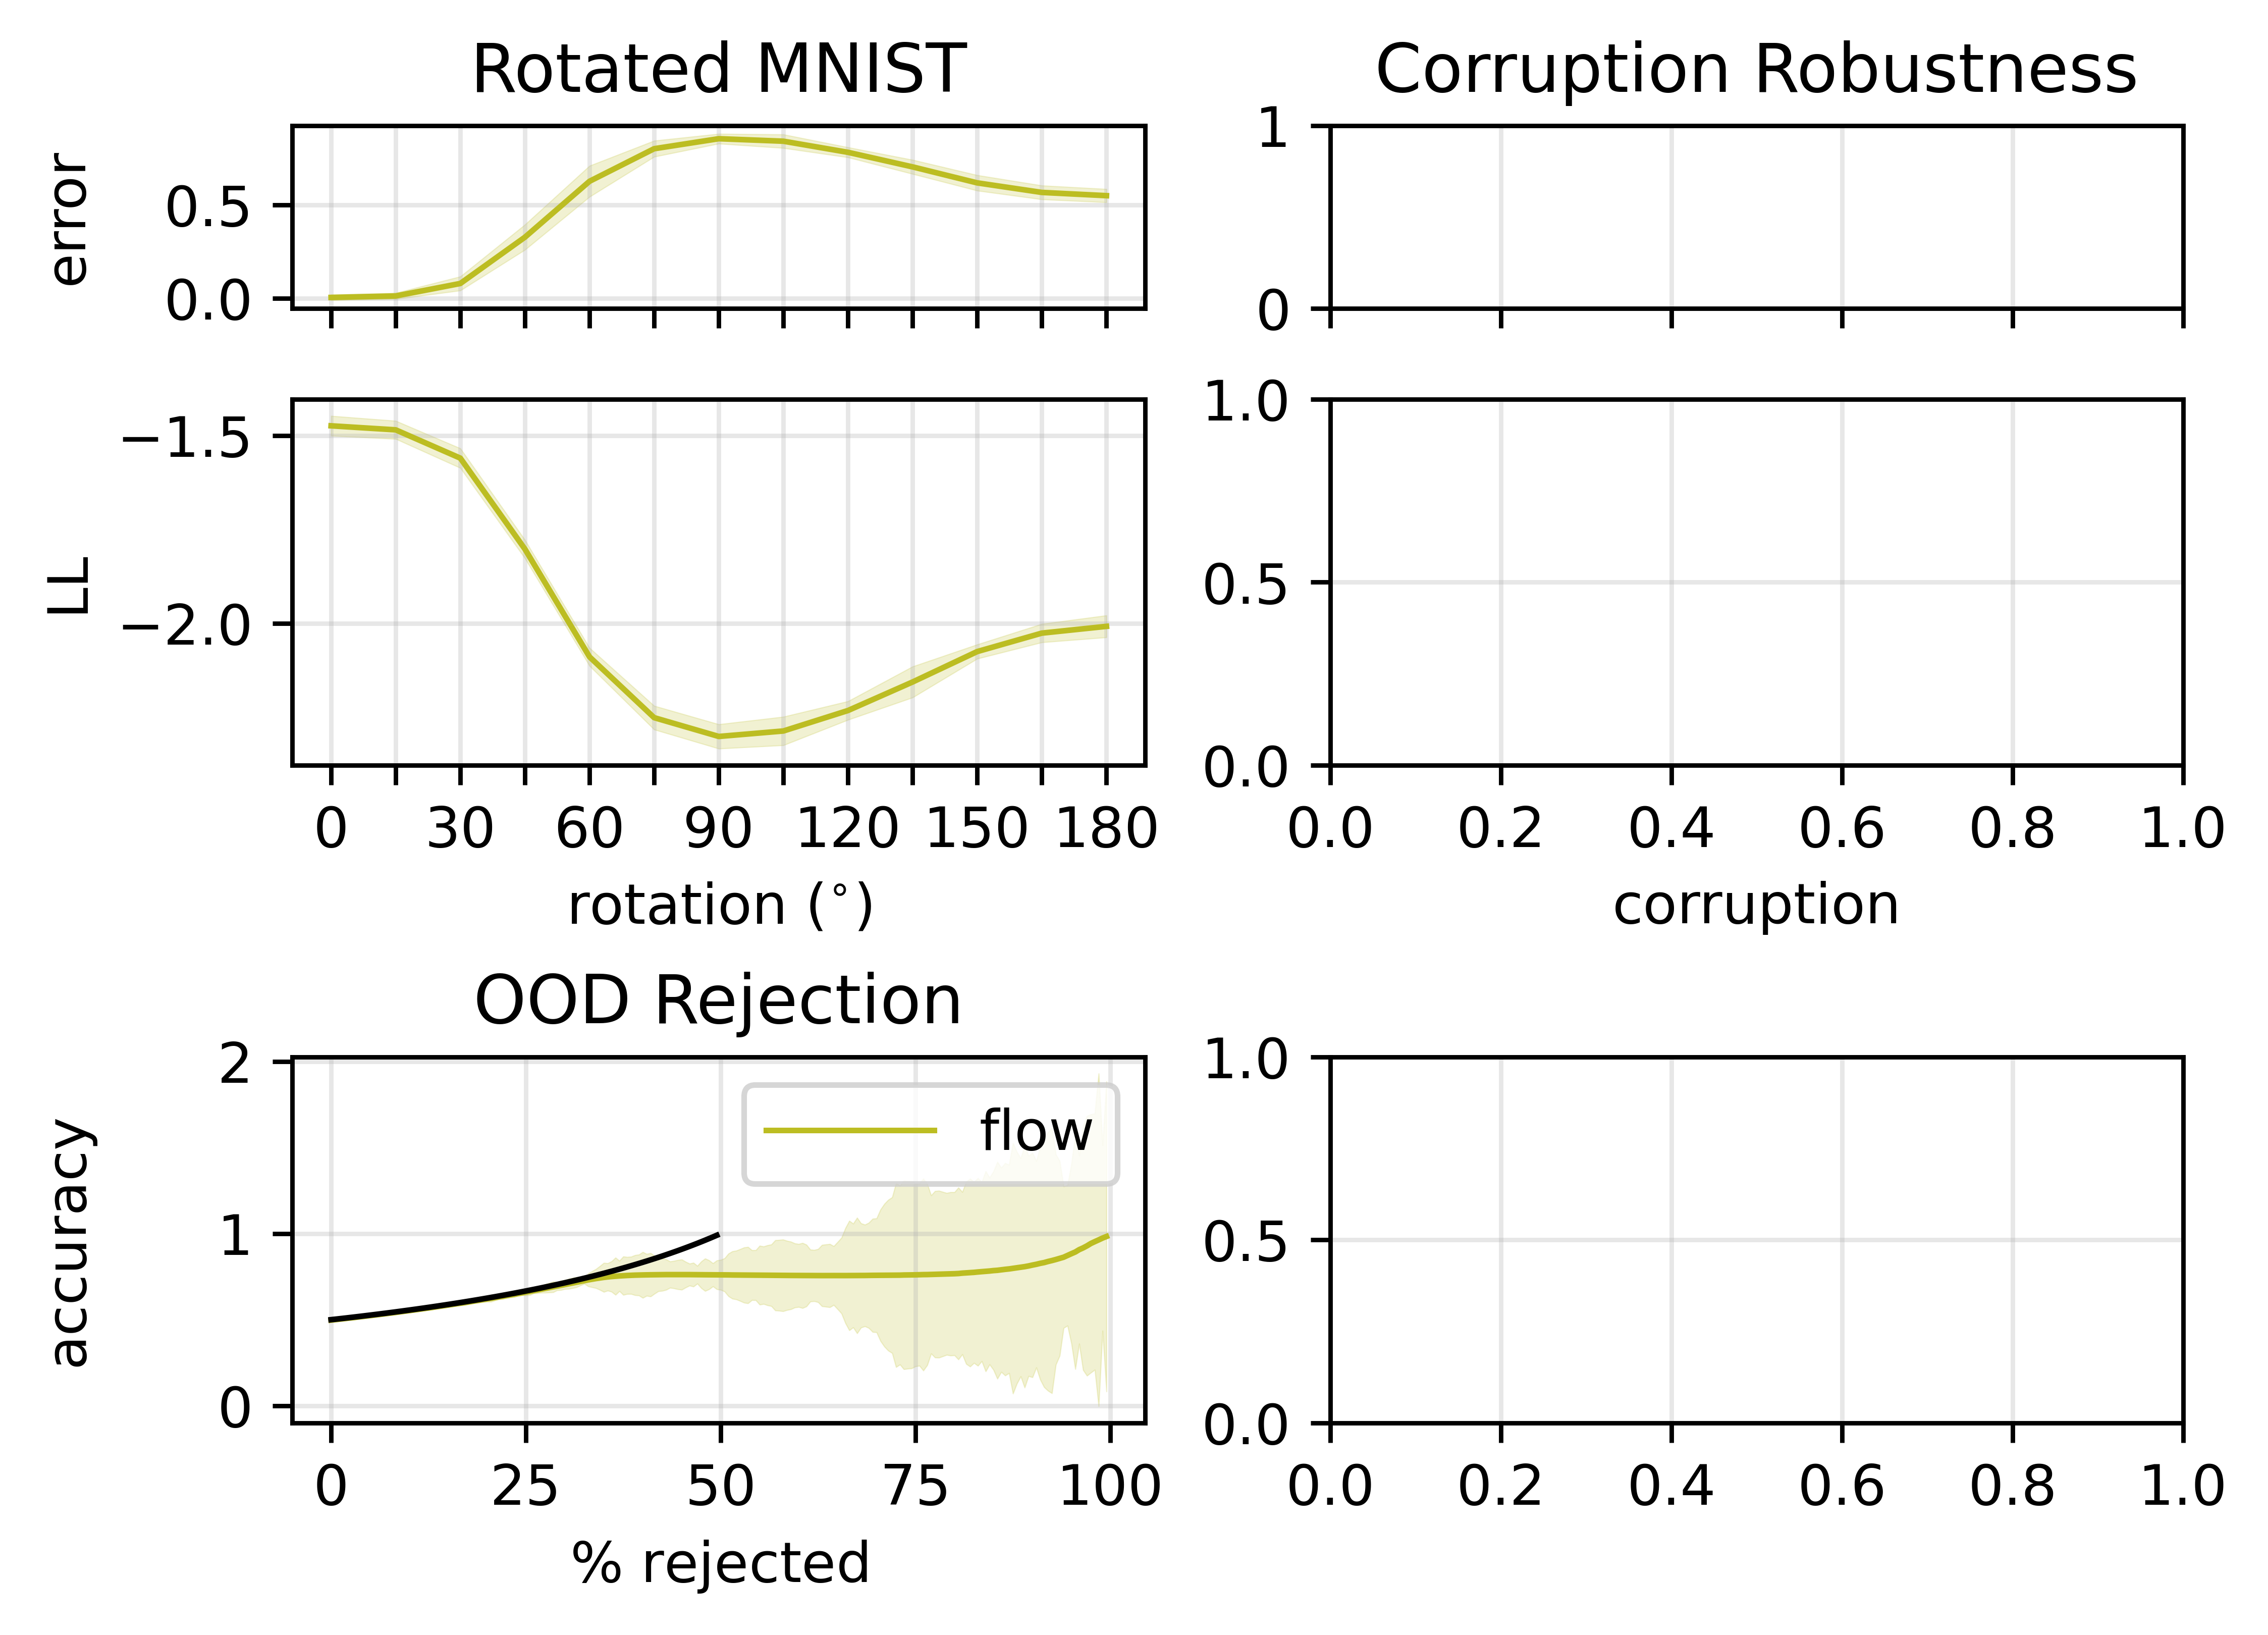

In [4]:
MNIST_warm = 3.

add_cond = {
#     "DUN": {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": False},
#     "SGD": {},
#     "ensemble": {"n_samples": 5},
#     "dropout": {"n_samples": 10, "p_drop": 0.1},
    "flow": {},
}

target_datasets = {
    "MNIST": ["Fashion"],
}

scale=1
dpi = 800

fig = plt.figure(constrained_layout=True, dpi=dpi,
                figsize=(scale*text_width, 2*scale*text_width*golden_ratio/1.6))

gs = GridSpec(11, 12, figure=fig)
ax1 = plt.subplot(gs.new_subplotspec((0, 0), rowspan=2, colspan=6))
ax2 = plt.subplot(gs.new_subplotspec((0, 6), rowspan=2, colspan=6))
ax3 = plt.subplot(gs.new_subplotspec((2, 0), rowspan=4, colspan=6), sharex=ax1)
ax4 = plt.subplot(gs.new_subplotspec((2, 6), rowspan=4, colspan=6), sharex=ax2)
ax5 = plt.subplot(gs.new_subplotspec((6, 0), rowspan=4, colspan=6))
ax6 = plt.subplot(gs.new_subplotspec((6, 6), rowspan=4, colspan=6))

ax1.grid(alpha=0.3, axis='both')
ax2.grid(alpha=0.3, axis='both')
ax3.grid(alpha=0.3, axis='both')
ax4.grid(alpha=0.3, axis='both')
ax5.grid(alpha=0.3, axis='both')
ax6.grid(alpha=0.3, axis='both')

add_cond_mnist = add_cond.copy()
# add_cond_mnist["DUN"] = {"start": 1, "stop": 13, "warmup": MNIST_warm, "use_no_train_post": False}
conditions = {"dataset": "MNIST"}
plot_rot_stats(img_df, "err", conditions,
            add_cond_mnist, ax1, formatting)
plot_rot_stats(img_df, "ll", conditions,
            add_cond_mnist, ax3, formatting)

ax1.set_title("Rotated MNIST")
ax1.set_ylabel("error")
ax1.tick_params(axis='x', labelbottom=False)

ax3.set_ylabel("LL")
ax3.set_xlabel("rotation ($^{\\circ}$)")
ax3.set_xticks(range(0, 181, 15))
ax3.set_xticklabels([str(i) if i % 2 == 0 else "" for i in range(0, 181, 15)])

# plot_cor_stats(img_df, "err", {"best_or_last": "last", "wd": 1., "model": "res50"},
#             add_cond, ax2, formatting)
# plot_cor_stats(img_df, "ll", {"best_or_last": "last", "wd": 1., "model": "res50"},
#             add_cond, ax4, formatting)

ax2.set_title("Corruption Robustness")
ax2.tick_params(axis='x', labelbottom=False)

ax4.set_xlabel("corruption")


add_cond_rej = add_cond.copy()
# add_cond_rej["DUN (exact)"] = {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": True}
plot_err_props(img_df, {"dataset": "MNIST", "target_dataset": "Fashion"}, add_cond_rej, ax5, formatting)

add_cond_paretto = {
    "SGD": {},
    "ensemble": {},
    "dropout": {"p_drop": 0.1},
    "DUN": {"start": 1, "stop": 13, "warmup": 0, "use_no_train_post": False},
    "flow": {},
}
# plot_paretto(img_df, "ll", 5., {"best_or_last": "last", "wd": 1., "model": "res50"},
#             add_cond_paretto, ax6, formatting)


ax5.set_title("OOD Rejection")
ax5.set_xlabel("$\%$ rejected")
ax5.set_ylabel("accuracy")
ax5.set_xticks([0., .25, .50, .75,  1.0])
ax5.set_xticklabels(["0", "25", "50", "75", "100"])

# ax6.set_title("\\textbf{Compute Time}")
# ax6.set_xlabel("time (s)")
# ax6.set_ylabel("LL")
# ax6.set_ylim([-2.59, -1.5])

legend_items = []
for key, val in formatting.items():
    if key == "dropout (0.3)": continue
    legend_items.append(mlines.Line2D([], [], color=val["color"],
                                    linestyle=val["linestyle"], label=val["label"], lw=1, ms=1))

ax5.legend(handles=legend_items, handlelength=3)

fig.align_ylabels()

plt.savefig('img_res_main.pdf', format='pdf', bbox_inches='tight', pad_inches=0.01)
plt.show()